In [42]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.shape

(8523, 12)

In [6]:
test.shape

(5681, 11)

In [9]:
# info of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
train.head()
# All the variables are defined correctly
# There are lot of zeros in item visibility

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [55]:
combined = pd.concat([train,test],ignore_index=True)

In [56]:
combined.shape

(14204, 12)

In [32]:
# Submitting the base model
train['Item_Outlet_Sales'].mean()
# In classification problem it is zero
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                       'Outlet_Identifier':test.Outlet_Identifier,
                       'Item_Outlet_Sales':train['Item_Outlet_Sales'].mean()})

In [38]:
solution.to_csv('submission1.csv',index=False)

# EDA Univariate Analysis

In [57]:
# Number columns
num = list(combined.select_dtypes(include=np.number).columns)
num.remove('Outlet_Establishment_Year')

In [59]:
len(num)

4

In [58]:
num

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

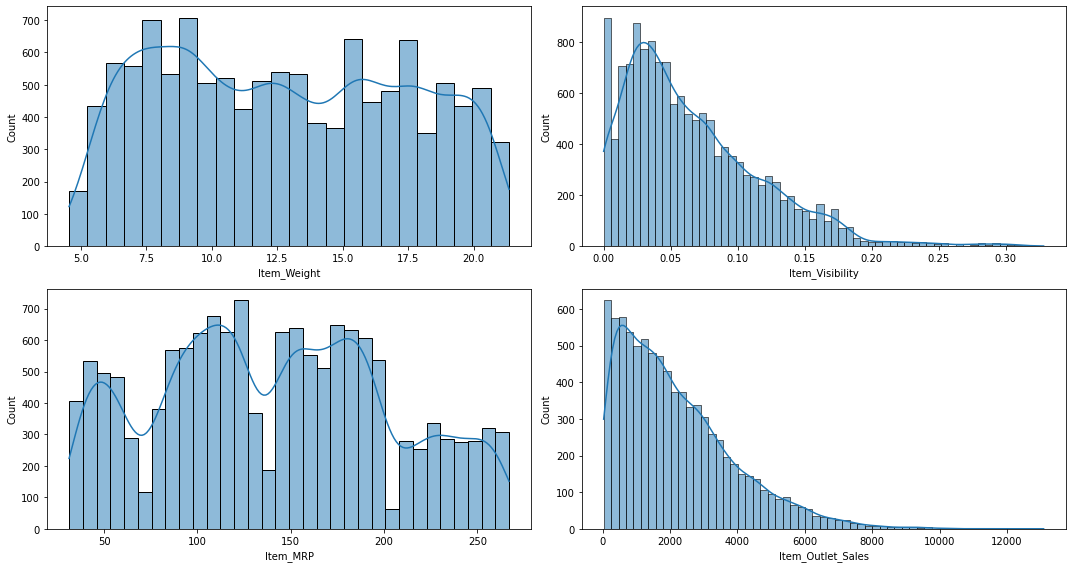

In [62]:
c=1
for i in num:
    plt.subplot(2,2,c)
    sns.histplot(combined[i],kde=True)
    plt.xlabel(i)
    c+=1
plt.tight_layout()
plt.show()

In [65]:
combined.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [79]:
cat = list(combined.select_dtypes(include=np.object_).columns)
cat.append('Outlet_Establishment_Year')
cat.remove('Item_Identifier')
cat,len(cat)

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type',
  'Outlet_Establishment_Year'],
 7)

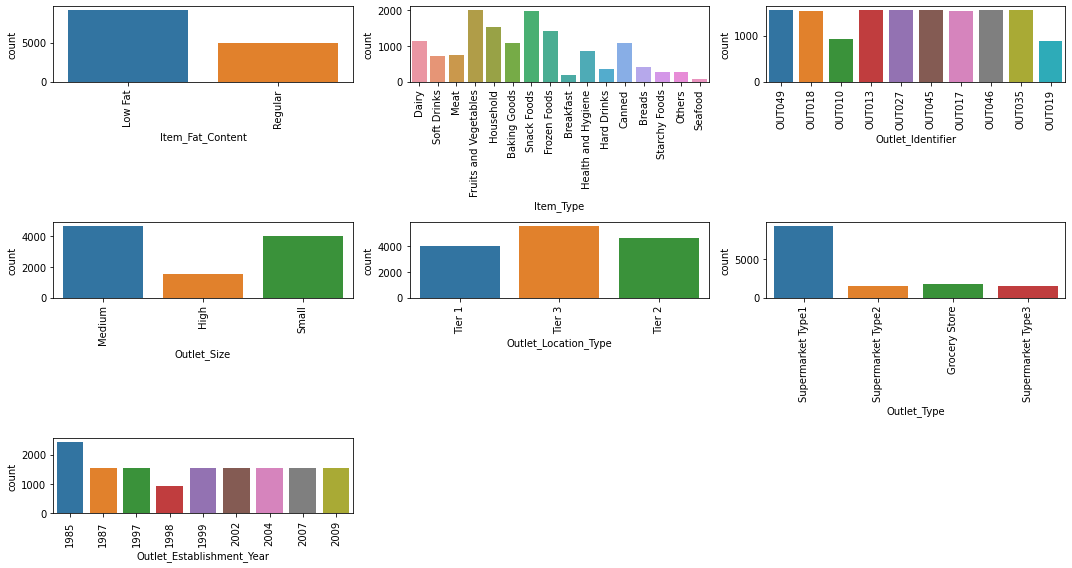

In [81]:
c=1
for i in cat:
    plt.subplot(3,3,c)
    sns.countplot(data=combined,x=i)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    c+=1
plt.tight_layout()
plt.show()

In [76]:
combined.Item_Fat_Content.replace(to_replace=['low fat','LF','reg'],
                                 value = ['Low Fat','Low Fat','Regular'],
                                 inplace=True)

In [78]:
for i in cat:
    print(i,'\n',(combined[i].value_counts()*100)/len(train))
    print('-'*60)

Item_Fat_Content 
 Low Fat    107.767218
Regular     58.887716
Name: Item_Fat_Content, dtype: float64
------------------------------------------------------------
Item_Type 
 Fruits and Vegetables    23.618444
Snack Foods              23.336853
Household                18.162619
Frozen Foods             16.731198
Dairy                    13.328640
Baking Goods             12.741992
Canned                   12.718526
Health and Hygiene       10.066878
Meat                      8.635457
Soft Drinks               8.518127
Breads                    4.880910
Hard Drinks               4.247331
Others                    3.285228
Starchy Foods             3.156166
Breakfast                 2.182330
Seafood                   1.044233
Name: Item_Type, dtype: float64
------------------------------------------------------------
Outlet_Size 
 Medium    54.616919
Small     46.697172
High      18.221284
Name: Outlet_Size, dtype: float64
------------------------------------------------------------
Out

In [83]:
# Descriptive statistics of numerical variables
combined[num].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,2181.288914
std,4.652502,0.051459,62.086938,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.710000,0.027036,94.012000,834.247400
50%,12.600000,0.054021,142.247000,1794.331000
75%,16.750000,0.094037,185.855600,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


# Bivariate Analysis
* Num Vs Num
* Cat Vs Num

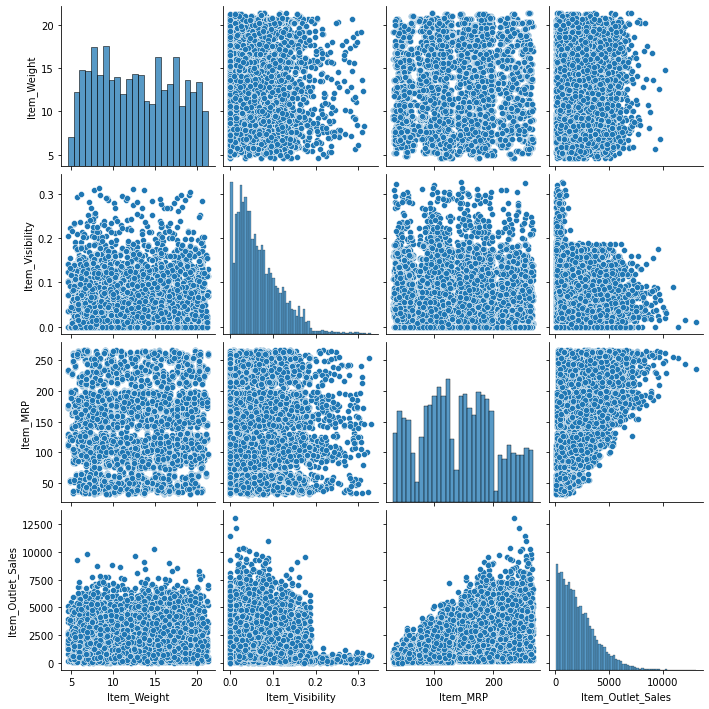

In [87]:
# Num vs num
sns.pairplot(combined[num])
plt.show()

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

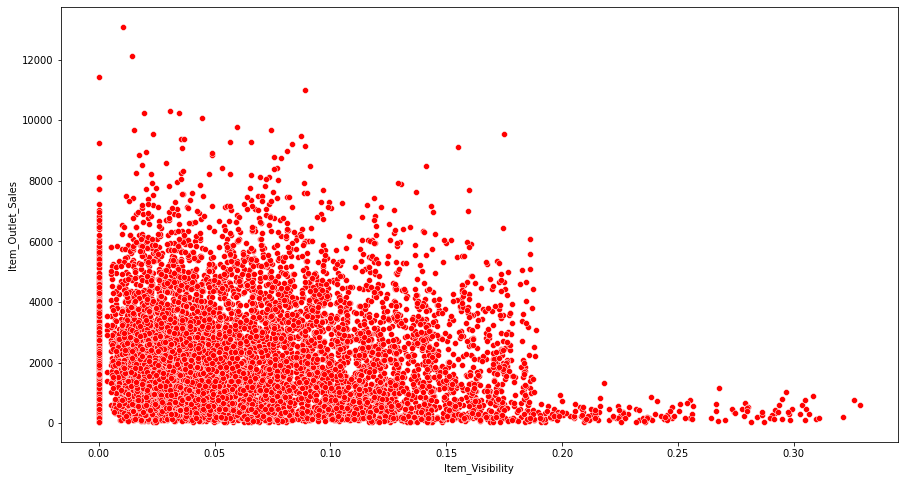

In [88]:
# Visibility Vs. Sales
sns.scatterplot(combined.Item_Visibility,combined.Item_Outlet_Sales,
               color='red')
# Lot of sales is captured where the visibility is zero

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

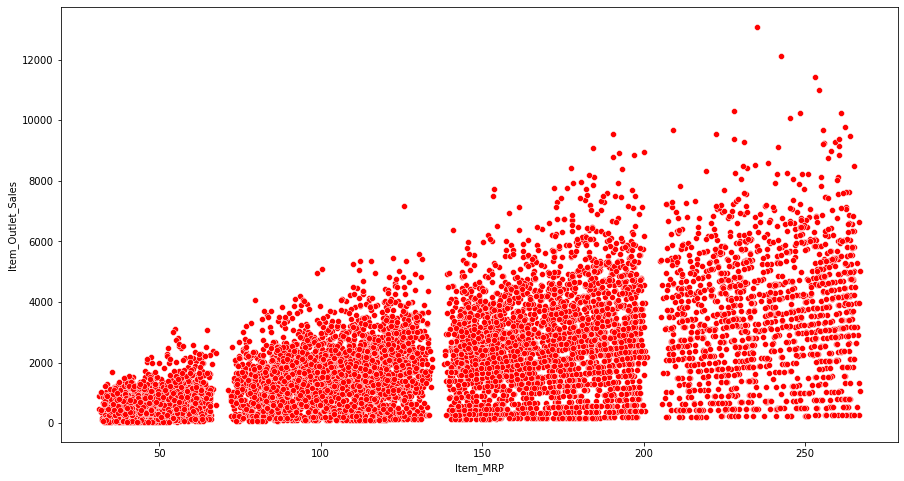

In [89]:
# Item_MRP vs sales
sns.scatterplot(combined.Item_MRP,combined.Item_Outlet_Sales,
               color='red')
# There are 4 different clusters emarging in the data
# Data seems hetroscedastic

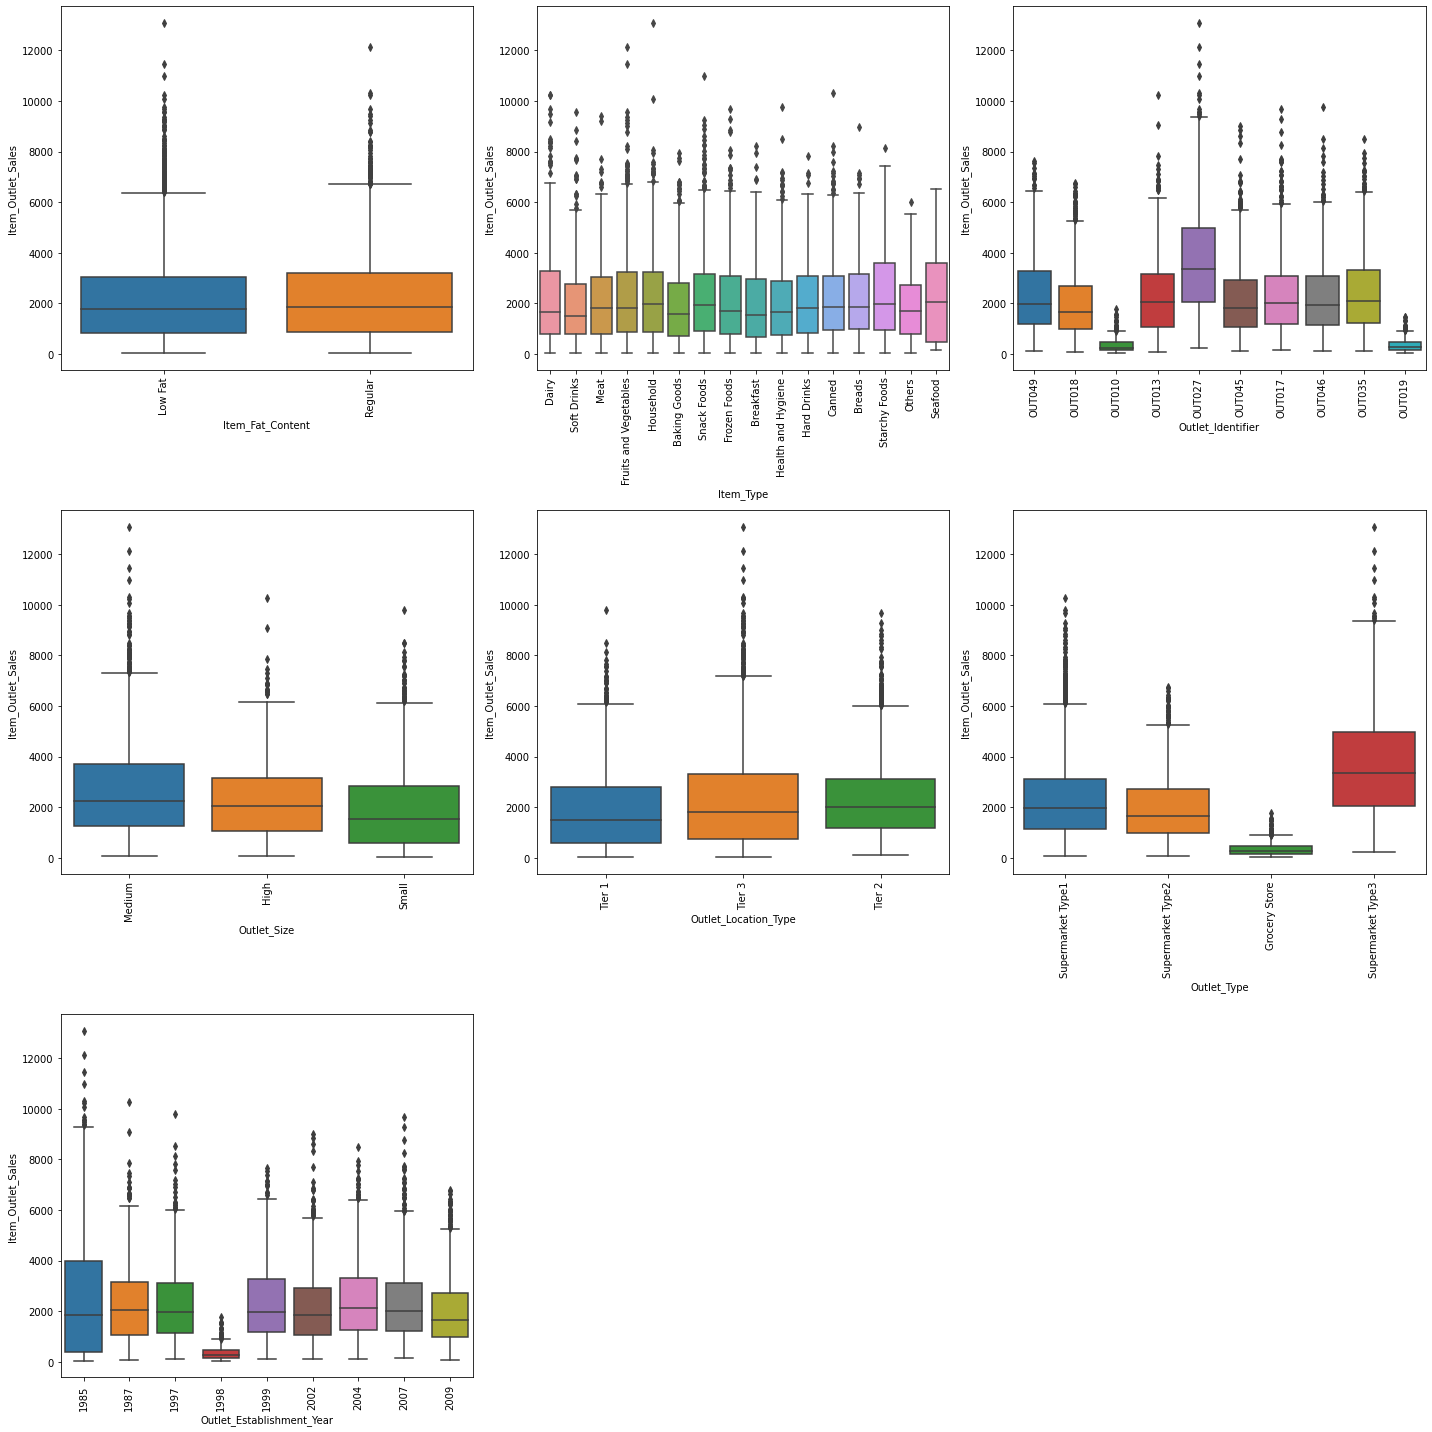

In [93]:
# cat vs number
plt.figure(figsize=[20,20])
cat
c=1
for i in cat:
    plt.subplot(3,3,c)
    sns.boxplot(data=combined,x=i,y='Item_Outlet_Sales')
    plt.xlabel(i)
    plt.xticks(rotation=90)
    c+=1
plt.tight_layout()
plt.show()

# Inferences
* Item_Fat_Content: Low_Fat has little higher sales
* Outlet_Size: Medium has higher sales
* Outlet_Location_Type: Tier 3 has higher sales
* Outlet_Type: 

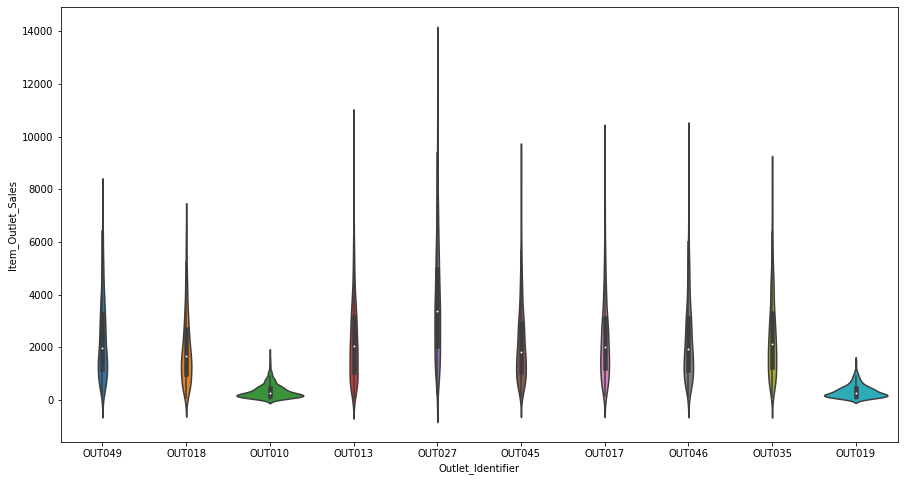

In [95]:
sns.violinplot(data=combined,x='Outlet_Identifier',y='Item_Outlet_Sales')
plt.show()

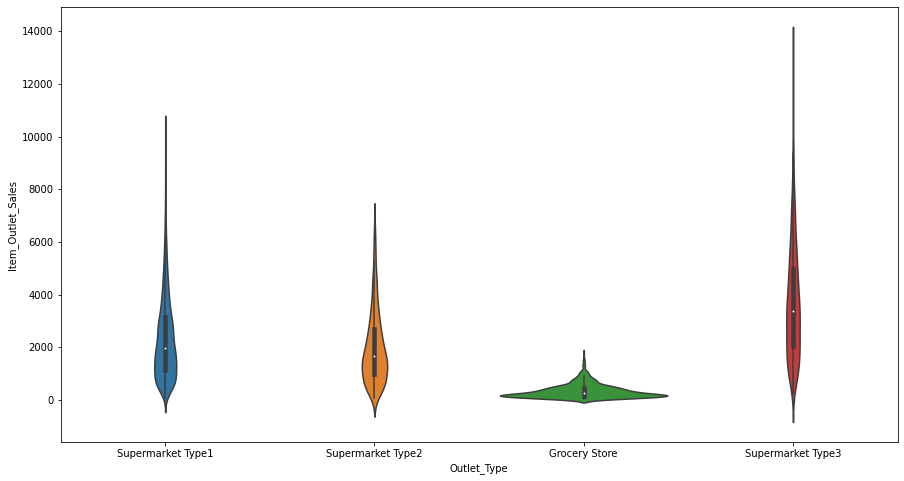

In [96]:
sns.violinplot(data=combined,x='Outlet_Type',y='Item_Outlet_Sales')
plt.show()

In [98]:
cat

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Establishment_Year']

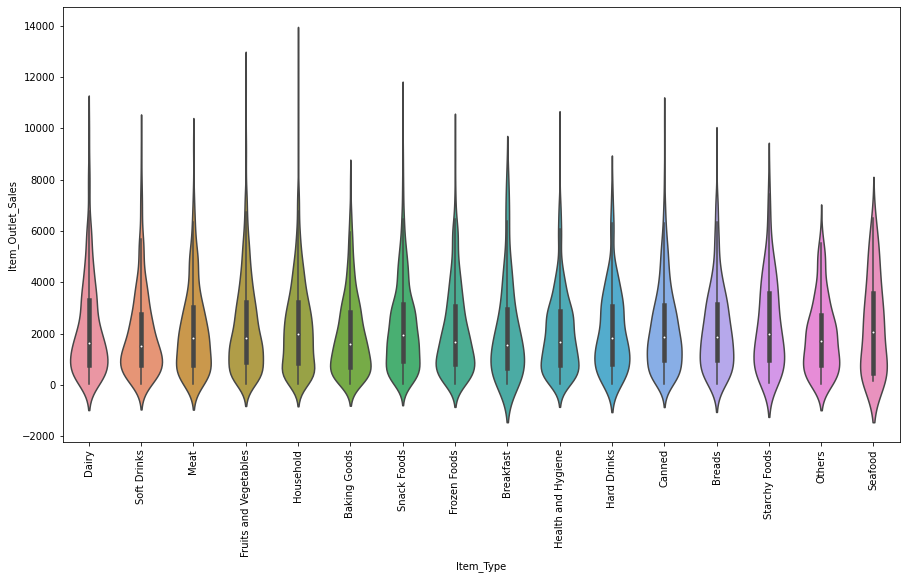

In [99]:
sns.violinplot(data=combined,x='Item_Type',y='Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.show()

In [106]:
combined.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [114]:
combined.groupby('Item_Identifier')[['Item_Outlet_Sales']].mean()

,Item_Outlet_Sales
Item_Identifier,
DRA12,1843.600200
DRA24,2246.218971
DRA59,2614.430150
DRB01,1518.024000
DRB13,2428.838400
...,...
NCZ30,1807.647000
NCZ41,1827.487840
NCZ42,3839.801760


In [116]:
# sns.barplot(data = combined.groupby('Item_Identifier')[['Item_Outlet_Sales']].mean(),
#            x = 'Item_Outlet_Sales',y=combined.groupby('Item_Identifier')[['Item_Outlet_Sales']].mean().index)

# Missing Values

In [117]:
# Missing values
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [120]:
# Item_Visibility has 0s that needs to be dealt with

In [121]:
combined.loc[combined.Item_Weight.isnull(),]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
14178,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14179,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14184,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14188,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [124]:
copy = combined.dropna()

In [125]:
import scipy.stats as stats

In [126]:
copy.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [127]:
stats.ttest_ind(copy.Item_Weight,copy.Item_MRP)

Ttest_indResult(statistic=-140.33365155871434, pvalue=0.0)

In [128]:
copy.loc[:,['Item_Weight','Item_MRP']].corr()

,Item_Weight,Item_MRP
Item_Weight,1.00000,0.03333
Item_MRP,0.03333,1.00000


D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_MRP'>

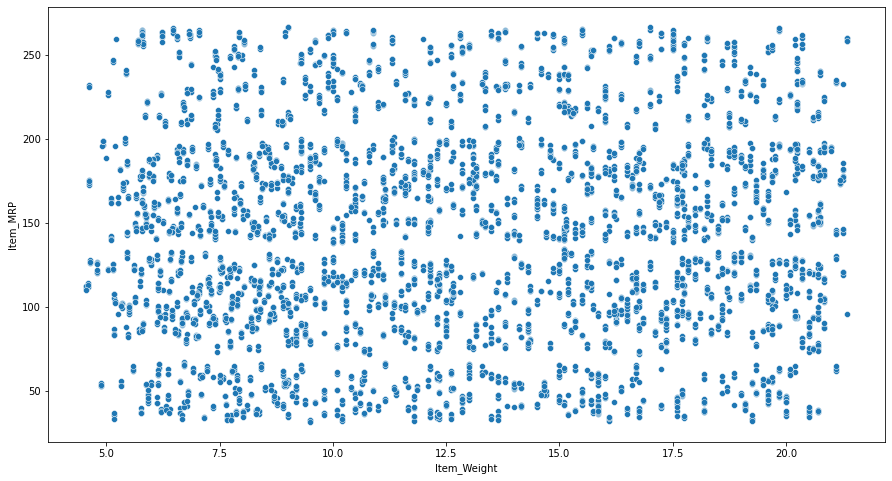

In [129]:
sns.scatterplot(copy.Item_Weight,copy.Item_MRP)

In [130]:
copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Type'>

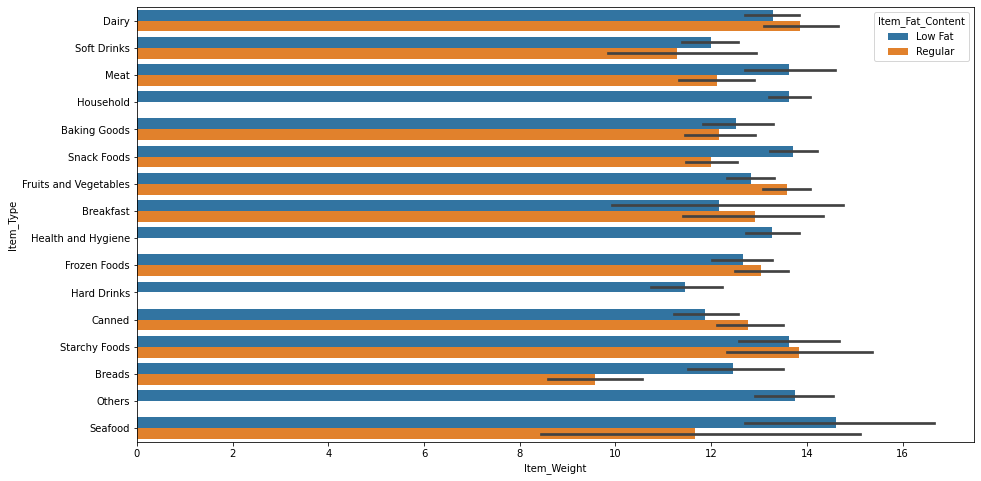

In [141]:
sns.barplot(data=copy,y = 'Item_Type',x='Item_Weight',hue='Item_Fat_Content')

In [134]:
copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [135]:
copy.select_dtypes(include=np.number)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
4,8.930,0.000000,53.8614,1987,994.7052
5,10.395,0.000000,51.4008,2009,556.6088
...,...,...,...,...,...
8517,20.750,0.083607,178.8318,1997,3608.6360
8518,6.865,0.056783,214.5218,1987,2778.3834
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


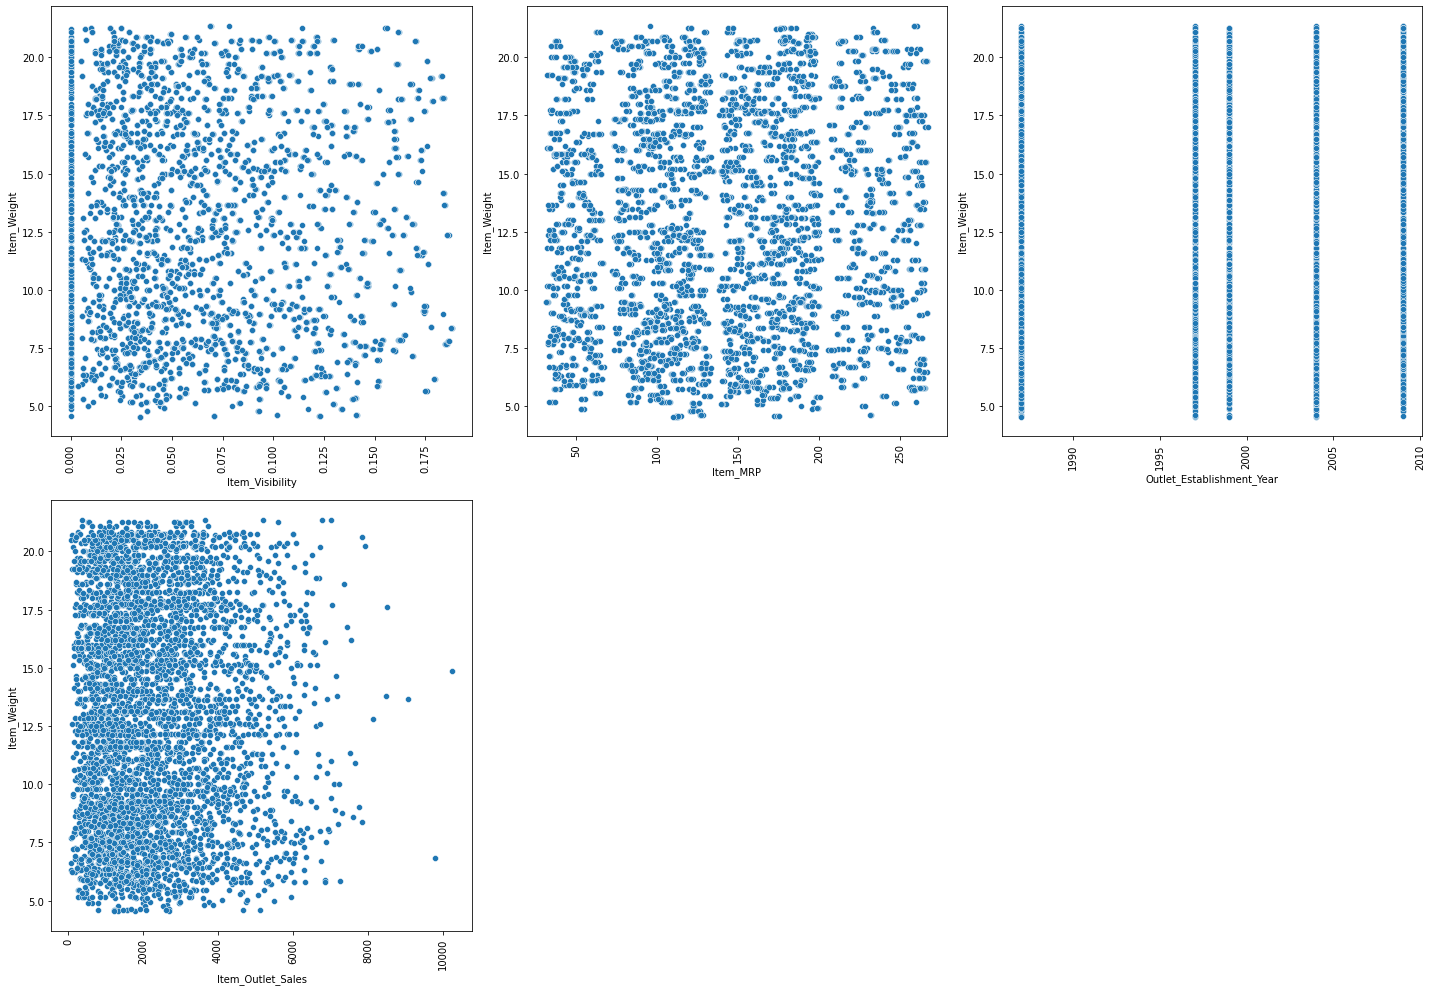

In [137]:
plt.figure(figsize=[20,20])
cat
c=1
for i in copy.drop(columns='Item_Weight').select_dtypes(include=np.number).columns:
    plt.subplot(3,3,c)
    sns.scatterplot(data=copy,x=i,y='Item_Weight')
    plt.xlabel(i)
    plt.xticks(rotation=90)
    c+=1
plt.tight_layout()
plt.show()

In [139]:
copy.drop(columns=['Item_Identifier','Outlet_Identifier',
                  'Outlet_Size','Outlet_Location_Type',
                  'Outlet_Type']).select_dtypes(include=np.object_).columns

Index(['Item_Fat_Content', 'Item_Type'], dtype='object')

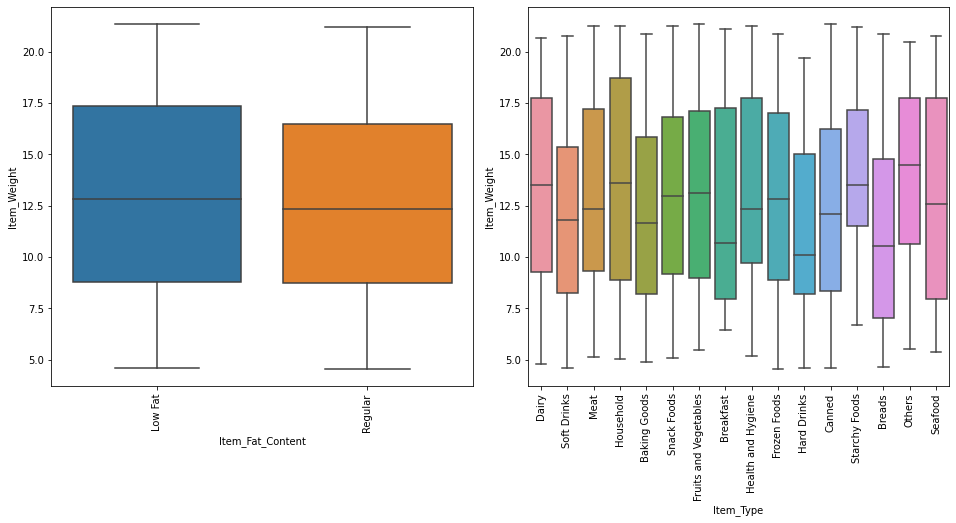

In [140]:
plt.figure(figsize=[20,20])
cat
c=1
for i in copy.drop(columns=['Item_Identifier','Outlet_Identifier',
                  'Outlet_Size','Outlet_Location_Type',
                  'Outlet_Type']).select_dtypes(include=np.object_).columns:
    plt.subplot(3,3,c)
    sns.boxplot(data=copy,x=i,y='Item_Weight')
    plt.xlabel(i)
    plt.xticks(rotation=90)
    c+=1
plt.tight_layout()
plt.show()

In [172]:
# Item_Identifier can be used to fill missing values
combined.loc[combined.Item_Identifier=='FDP10','Item_Weight']

7         NaN
585      19.0
2623     19.0
3382     19.0
4585     19.0
6087     19.0
7883     19.0
11896    19.0
12371    19.0
13327     NaN
Name: Item_Weight, dtype: float64

In [ ]:
combined.fillna()

In [168]:
combined.loc[:,'Item_Identifier']=='FDP10'

0        False
1        False
2        False
3        False
4        False
         ...  
14199    False
14200    False
14201    False
14202    False
14203    False
Name: Item_Identifier, Length: 14204, dtype: bool

In [174]:
combined.loc[combined.Item_Identifier=='FDP10','Item_Weight'].mean()

19.0

In [189]:
#  This is wrong it will change null values for all rows because of fillna
ind = list(combined[combined.Item_Weight.isnull()].index)
for i in ind:
    val=combined.loc[combined.Item_Identifier==combined.loc[i,'Item_Identifier'],'Item_Weight'].mean()
    combined.Item_Weight.fillna(val,inplace=True)

In [199]:
combined.Item_Weight.isnull().sum()

0

In [198]:
combined['Item_Weight'] = combined.Item_Identifier.map(np.round(combined.groupby('Item_Identifier')['Item_Weight'].mean(),2).to_dict())

In [202]:
# Item Visibility == 00
combined['Item_Visibility'] = combined.groupby('Item_Identifier')['Item_Visibility'].apply(lambda x:x.replace(0,value=x.median()))

In [214]:
combined.loc[combined.Item_Visibility==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [212]:
val = combined.loc[combined.Item_Type=='Fruits and Vegetables','Item_Visibility'].median()

In [213]:
combined.Item_Visibility.replace(0,val,inplace=True)

In [215]:
combined.loc[combined.Item_Visibility==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [217]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [221]:
# Outlet_Size Null values
combined.Outlet_Size.mode()

0    Medium
Name: Outlet_Size, dtype: object

In [225]:
combined[combined.Outlet_Size.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.18,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.82,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.16,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,14.33,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,8.83,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
14191,FDC44,15.98,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
14193,FDO03,12.31,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14201,NCO17,12.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,16.04,Regular,0.084831,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

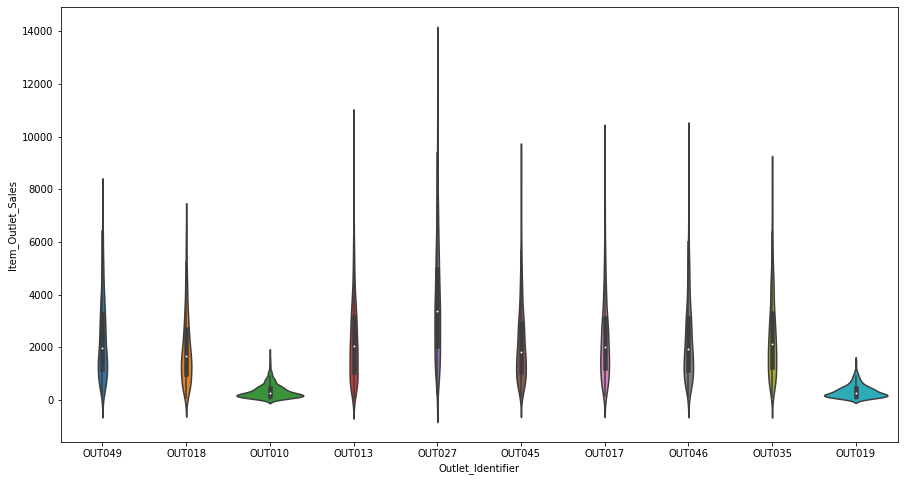

In [226]:
# Check the voilin plot of outletid and sales
# check the violinplot of outlet size and sales
sns.violinplot(x = 'Outlet_Identifier',y="Item_Outlet_Sales",data=combined)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

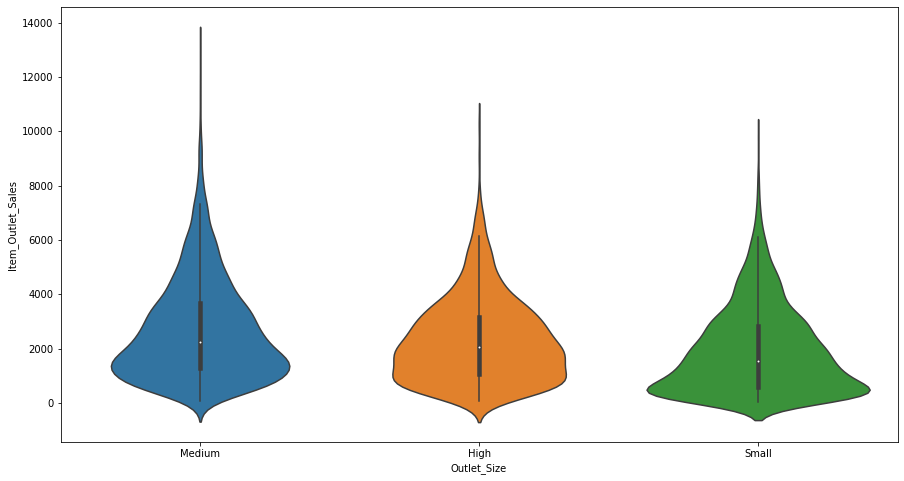

In [227]:
sns.violinplot(x = 'Outlet_Size',y="Item_Outlet_Sales",data=combined)

In [231]:
# Filling small where outlet10 and outlet19 appear to have same data distribution
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [234]:
combined.loc[combined.Outlet_Identifier=='OUT010','Outlet_Size']='Small'

In [235]:
# Check the Numerical Analysis
combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


In [236]:
# Desc Stats of Sales basis outlet type
combined.groupby('Outlet_Size')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Size,,,,,,,,
High,932.0,2298.995256,1533.531664,73.2380,1072.6038,2050.6640,3166.37835,10256.6490
Medium,2793.0,2681.603542,1855.210528,69.2432,1270.3464,2251.0698,3691.19520,13086.9648
Small,2943.0,1615.546167,1556.928329,33.2900,362.5281,1090.5804,2463.46000,9779.9362


In [ ]:
# Outlet Location Type & Outlet Type ~Outlet Size




In [237]:
# Outlet ID ~ Grocery or Something else..
combined.loc[combined.Outlet_Identifier=='OUT017','Outlet_Type'].value_counts()

Supermarket Type1    1543
Name: Outlet_Type, dtype: int64

In [242]:
combined.loc[combined.Outlet_Identifier=='Supermarket Type1','Outlet_Size'].value_counts()

Series([], Name: Outlet_Size, dtype: int64)

In [246]:
combined.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           880
                      Supermarket Type1  Medium         1550
                                         Small          1550
Tier 2                Supermarket Type1  Small          1550
Tier 3                Grocery Store      Small           925
                      Supermarket Type1  High           1553
                      Supermarket Type2  Medium         1546
                      Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [250]:
# Outlet45
combined.loc[combined.Outlet_Identifier=='OUT045','Outlet_Size']='High'

In [251]:
combined.loc[combined.Outlet_Identifier=='OUT017','Outlet_Size']='Small'

In [252]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# Feature Engineering

In [253]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,10.38,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,7.37,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.80,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.18,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,10.05,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [256]:
combined['Item_Ids'] = combined.Item_Identifier.apply(lambda x:x[:2])

In [257]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids
0,FDA15,10.38,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,7.37,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.80,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.18,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,10.05,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [260]:
# Non Edible
combined.loc[combined.Item_Ids=='NC','Item_Fat_Content']='Non Edible'

In [261]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids
0,FDA15,10.38,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,7.37,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.80,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.18,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,10.05,Non Edible,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [263]:
combined.Item_Type.unique(),len(combined.Item_Type.unique())

(array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
        'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
        'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
        'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object),
 16)

In [266]:
# Bin this data
# Perishable
perishable = ['Dairy', 'Meat', 'Fruits and Vegetables',
              'Breakfast','Breads', 'Seafood']

In [268]:
combined['ItemType_Cat'] = combined.Item_Type.apply(lambda x : 'Perishable' if x in perishable else 'Non_Perishable')

In [269]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,ItemType_Cat
0,FDA15,10.38,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable
1,DRC01,7.37,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishable
2,FDN15,17.80,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable
3,FDX07,19.18,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishable
4,NCD19,10.05,Non Edible,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishable


In [275]:
combined['Outlet_Freq'] = combined.Outlet_Identifier.map(combined.Outlet_Identifier.value_counts()/len(combined))

In [278]:
# Vintage
combined['Outlet_Vintage'] = 2013 - combined.Outlet_Establishment_Year

In [279]:
combined['Sales'] = combined.Item_Weight*combined.Item_MRP

In [281]:
combined.loc[:,['Sales','Item_Outlet_Sales']].corr()

,Sales,Item_Outlet_Sales
Sales,1.000000,0.470204
Item_Outlet_Sales,0.470204,1.000000


<AxesSubplot:xlabel='Sales', ylabel='Item_Outlet_Sales'>

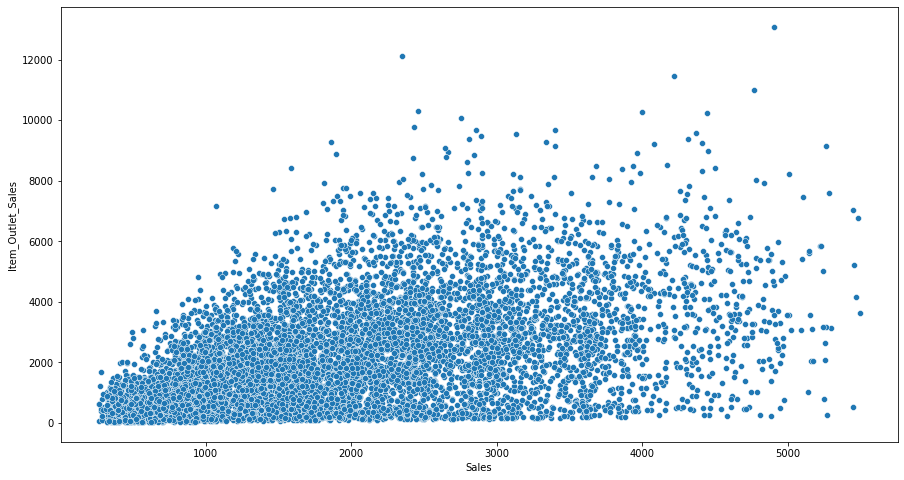

In [282]:
sns.scatterplot(x='Sales',y='Item_Outlet_Sales',data=combined)
# Hetroscedastic pattern

In [322]:
# Drop the variables
final = combined.drop(columns=['Item_Identifier','Item_Type','Outlet_Identifier',
                      'Outlet_Establishment_Year'])
final.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,ItemType_Cat,Outlet_Freq,Outlet_Vintage,Sales
0,10.38,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,0.109124,14,2593.019496
1,7.37,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishable,0.108843,4,355.744004
2,17.80,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,0.109124,14,2520.800400
3,19.18,Regular,0.022914,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Perishable,0.065123,15,3492.582100
4,10.05,Non Edible,0.013177,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishable,0.109335,26,541.307070


# Stastistical Tests

In [292]:
# New sales created has some impact on tgt
# Ho: Sales has impact on tgt
# Ha: Sales has no impact on tgt
stats.ttest_ind(final.Sales.dropna(),final.Item_Outlet_Sales.dropna())
# Column is isgnificant

Ttest_indResult(statistic=-11.900660876859574, pvalue=1.4672274553669226e-32)

In [293]:
# Reject Ho. New column is significant
stats.ttest_ind(final.Outlet_Vintage.dropna(),final.Item_Outlet_Sales.dropna())

Ttest_indResult(statistic=-151.27920299384095, pvalue=0.0)

In [295]:
stats.ttest_ind(final.Outlet_Freq.dropna(),final.Item_Outlet_Sales.dropna())

Ttest_indResult(statistic=-152.33444860527277, pvalue=0.0)

In [294]:
cat = list(final.select_dtypes(include=np.object_).columns)
cat

['Item_Fat_Content',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Ids',
 'ItemType_Cat']

In [298]:
# Split the data in train and test


In [328]:
final['Outlet_Size'] = final['Outlet_Size'].map({'Small':1,'Medium':2,'High':3})
final.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,ItemType_Cat,Outlet_Freq,Outlet_Vintage,Sales
0,10.38,Low Fat,0.016047,249.8092,2,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,0.109124,14,2593.019496
1,7.37,Regular,0.019278,48.2692,2,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishable,0.108843,4,355.744004
2,17.80,Low Fat,0.016760,141.6180,2,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,0.109124,14,2520.800400
3,19.18,Regular,0.022914,182.0950,1,Tier 3,Grocery Store,732.3800,FD,Perishable,0.065123,15,3492.582100
4,10.05,Non Edible,0.013177,53.8614,3,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishable,0.109335,26,541.307070


In [334]:
# Encoding the data in dummies
# final['Outlet_Size'] = final.Outlet_Size.map({'Small':1,'Medium':2,'High':3})
dummydata = pd.get_dummies(final,drop_first=True)

In [335]:
dummydata.shape

(14204, 18)

In [343]:
# Split data
newtrain = dummydata.loc[:train.shape[0]-1,]
newtest = dummydata.loc[train.shape[0]:,]

In [348]:
newtest.drop(columns='Item_Outlet_Sales',inplace=True)

C:\Users\PREDATOR\AppData\Local\Temp/ipykernel_1304/3828687615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtest.drop(columns='Item_Outlet_Sales',inplace=True)


# Model Building

In [349]:
newtrain.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_Freq,Outlet_Vintage,Sales,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Ids_FD,Item_Ids_NC,ItemType_Cat_Perishable
0,10.38,0.016047,249.8092,2,3735.1380,0.109124,14,2593.019496,0,0,0,0,1,0,0,1,0,1
1,7.37,0.019278,48.2692,2,443.4228,0.108843,4,355.744004,0,1,0,1,0,1,0,0,0,0
2,17.80,0.016760,141.6180,2,2097.2700,0.109124,14,2520.800400,0,0,0,0,1,0,0,1,0,1
3,19.18,0.022914,182.0950,1,732.3800,0.065123,15,3492.582100,0,1,0,1,0,0,0,1,0,1
4,10.05,0.013177,53.8614,3,994.7052,0.109335,26,541.307070,1,0,0,1,1,0,0,0,1,0


In [333]:
from sklearn.ensemble import RandomForestRegressor

In [352]:
forest = RandomForestRegressor(random_state=100).fit(newtrain.drop(columns='Item_Outlet_Sales'),
                                    newtrain['Item_Outlet_Sales'])

In [356]:
newtest

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Freq,Outlet_Vintage,Sales,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Ids_FD,Item_Ids_NC,ItemType_Cat_Perishable
8523,20.36,0.007565,107.8622,2,0.109124,14,2196.074392,0,0,0,0,1,0,0,1,0,0
8524,9.49,0.038428,87.3198,1,0.108631,6,828.664902,0,1,1,0,1,0,0,1,0,1
8525,15.09,0.099575,241.7538,1,0.065123,15,3648.064842,1,0,0,1,0,0,0,0,1,0
8526,9.91,0.015388,155.0340,1,0.108631,6,1536.386940,0,0,1,0,1,0,0,1,0,0
8527,14.80,0.118599,234.2300,2,0.109758,28,3466.604000,0,1,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,12.20,0.013496,141.3154,1,0.109124,16,1724.047880,0,1,0,0,1,0,0,1,0,0
14200,9.88,0.142991,169.1448,2,0.108843,4,1671.150624,0,1,0,1,0,1,0,1,0,0
14201,12.00,0.073529,118.7440,3,0.108983,11,1424.928000,1,0,1,0,1,0,0,0,1,0
14202,16.04,0.084831,214.6218,1,0.108631,6,3442.533672,0,1,1,0,1,0,0,1,0,0


In [353]:
ypred_forest = forest.predict(newtest)
ypred_forest

array([1487.357252, 1501.984878,  693.304198, ..., 1882.176652,
       3372.157156, 1482.86976 ])

In [354]:
from sklearn.linear_model import LinearRegression

In [357]:
ypred_lr = LinearRegression().fit(newtrain.drop(columns='Item_Outlet_Sales'),newtrain['Item_Outlet_Sales']).predict(newtest)
ypred_lr

array([1771.31579844, 1605.37455842, 1887.18217849, ..., 1848.79646179,
       3561.91975208, 1302.8551992 ])

In [359]:
from sklearn.tree import DecisionTreeRegressor
ypred_tree = DecisionTreeRegressor(random_state=100).fit(newtrain.drop(columns='Item_Outlet_Sales'),newtrain['Item_Outlet_Sales']).predict(newtest)
ypred_tree

array([1693.7952, 1831.6158,  985.384 , ..., 3199.8348, 1923.4962,
       2157.192 ])

In [362]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
ypred_gb = GradientBoostingRegressor(random_state=100).fit(newtrain.drop(columns='Item_Outlet_Sales'),newtrain['Item_Outlet_Sales']).predict(newtest)
ypred_gb

array([1600.91686156, 1423.54960812,  568.62293518, ..., 1803.60952179,
       3541.9308581 , 1270.55632184])

In [363]:
ypred_ada = AdaBoostRegressor(random_state=100).fit(newtrain.drop(columns='Item_Outlet_Sales'),newtrain['Item_Outlet_Sales']).predict(newtest)
ypred_ada

array([2053.84256519, 1673.73332466, 2163.5039937 , ..., 2195.91997974,
       3841.8646282 , 1761.40860852])

In [364]:
from catboost import CatBoostRegressor

In [365]:
ypred_cat = CatBoostRegressor(random_state=100).fit(newtrain.drop(columns='Item_Outlet_Sales'),newtrain['Item_Outlet_Sales']).predict(newtest)
ypred_cat

Learning rate set to 0.05744
0:	learn: 1650.9829230	total: 152ms	remaining: 2m 32s
1:	learn: 1600.4402363	total: 157ms	remaining: 1m 18s
2:	learn: 1554.0608043	total: 162ms	remaining: 54s
3:	learn: 1511.4818976	total: 168ms	remaining: 41.8s
4:	learn: 1475.0917415	total: 173ms	remaining: 34.4s
5:	learn: 1437.9105569	total: 178ms	remaining: 29.5s
6:	learn: 1406.4788542	total: 184ms	remaining: 26s
7:	learn: 1375.8316137	total: 188ms	remaining: 23.4s
8:	learn: 1346.4523730	total: 194ms	remaining: 21.4s
9:	learn: 1322.4996489	total: 199ms	remaining: 19.7s
10:	learn: 1299.7320423	total: 204ms	remaining: 18.3s
11:	learn: 1278.2831994	total: 209ms	remaining: 17.2s
12:	learn: 1258.5696641	total: 214ms	remaining: 16.2s
13:	learn: 1240.9825002	total: 219ms	remaining: 15.4s
14:	learn: 1226.2021817	total: 224ms	remaining: 14.7s
15:	learn: 1211.6289212	total: 229ms	remaining: 14.1s
16:	learn: 1199.2641066	total: 234ms	remaining: 13.5s
17:	learn: 1187.4586018	total: 239ms	remaining: 13s
18:	learn: 11

179:	learn: 1019.1244890	total: 1.03s	remaining: 4.69s
180:	learn: 1018.7225668	total: 1.03s	remaining: 4.68s
181:	learn: 1018.6117075	total: 1.04s	remaining: 4.67s
182:	learn: 1018.2677521	total: 1.04s	remaining: 4.67s
183:	learn: 1017.9178129	total: 1.05s	remaining: 4.66s
184:	learn: 1017.5803872	total: 1.05s	remaining: 4.65s
185:	learn: 1017.3518846	total: 1.06s	remaining: 4.64s
186:	learn: 1017.0513379	total: 1.06s	remaining: 4.63s
187:	learn: 1016.7900137	total: 1.07s	remaining: 4.63s
188:	learn: 1016.3893441	total: 1.08s	remaining: 4.63s
189:	learn: 1016.0926687	total: 1.08s	remaining: 4.62s
190:	learn: 1015.7411711	total: 1.09s	remaining: 4.61s
191:	learn: 1015.3815270	total: 1.09s	remaining: 4.6s
192:	learn: 1015.0761381	total: 1.1s	remaining: 4.59s
193:	learn: 1014.7113009	total: 1.1s	remaining: 4.59s
194:	learn: 1014.3263976	total: 1.11s	remaining: 4.58s
195:	learn: 1013.9480524	total: 1.11s	remaining: 4.57s
196:	learn: 1013.5402401	total: 1.12s	remaining: 4.56s
197:	learn: 1

335:	learn: 971.8797553	total: 1.9s	remaining: 3.75s
336:	learn: 971.5375987	total: 1.9s	remaining: 3.75s
337:	learn: 971.3489037	total: 1.91s	remaining: 3.74s
338:	learn: 971.0272022	total: 1.91s	remaining: 3.73s
339:	learn: 970.6106365	total: 1.92s	remaining: 3.73s
340:	learn: 970.3328063	total: 1.92s	remaining: 3.72s
341:	learn: 970.2282103	total: 1.93s	remaining: 3.71s
342:	learn: 969.9621777	total: 1.93s	remaining: 3.7s
343:	learn: 969.7583162	total: 1.94s	remaining: 3.7s
344:	learn: 969.5061162	total: 1.94s	remaining: 3.69s
345:	learn: 969.3632802	total: 1.95s	remaining: 3.68s
346:	learn: 969.1507003	total: 1.95s	remaining: 3.68s
347:	learn: 968.8022249	total: 1.96s	remaining: 3.67s
348:	learn: 968.5275423	total: 1.96s	remaining: 3.66s
349:	learn: 968.2599718	total: 1.97s	remaining: 3.66s
350:	learn: 968.1562274	total: 1.97s	remaining: 3.65s
351:	learn: 967.7544006	total: 1.98s	remaining: 3.64s
352:	learn: 967.6473605	total: 1.98s	remaining: 3.63s
353:	learn: 967.2358465	total: 1

510:	learn: 932.5415693	total: 2.77s	remaining: 2.65s
511:	learn: 932.3109831	total: 2.78s	remaining: 2.65s
512:	learn: 932.1092966	total: 2.78s	remaining: 2.64s
513:	learn: 932.0129334	total: 2.79s	remaining: 2.64s
514:	learn: 931.6993636	total: 2.79s	remaining: 2.63s
515:	learn: 931.4025898	total: 2.8s	remaining: 2.63s
516:	learn: 931.2181460	total: 2.8s	remaining: 2.62s
517:	learn: 931.0179060	total: 2.81s	remaining: 2.61s
518:	learn: 930.8092772	total: 2.81s	remaining: 2.61s
519:	learn: 930.6634055	total: 2.82s	remaining: 2.6s
520:	learn: 930.4444679	total: 2.82s	remaining: 2.6s
521:	learn: 930.1118128	total: 2.83s	remaining: 2.59s
522:	learn: 929.9757801	total: 2.83s	remaining: 2.58s
523:	learn: 929.6217084	total: 2.84s	remaining: 2.58s
524:	learn: 929.3244682	total: 2.84s	remaining: 2.57s
525:	learn: 929.1487375	total: 2.85s	remaining: 2.57s
526:	learn: 928.9935670	total: 2.85s	remaining: 2.56s
527:	learn: 928.7874311	total: 2.86s	remaining: 2.56s
528:	learn: 928.5520221	total: 2

679:	learn: 901.3360867	total: 3.65s	remaining: 1.72s
680:	learn: 901.2760361	total: 3.65s	remaining: 1.71s
681:	learn: 901.1031983	total: 3.66s	remaining: 1.71s
682:	learn: 900.8562494	total: 3.66s	remaining: 1.7s
683:	learn: 900.7317477	total: 3.67s	remaining: 1.69s
684:	learn: 900.5307936	total: 3.67s	remaining: 1.69s
685:	learn: 900.3956633	total: 3.68s	remaining: 1.68s
686:	learn: 900.1677323	total: 3.68s	remaining: 1.68s
687:	learn: 899.9466442	total: 3.69s	remaining: 1.67s
688:	learn: 899.7496041	total: 3.69s	remaining: 1.67s
689:	learn: 899.5668951	total: 3.7s	remaining: 1.66s
690:	learn: 899.3281250	total: 3.7s	remaining: 1.66s
691:	learn: 899.1208072	total: 3.71s	remaining: 1.65s
692:	learn: 899.0445508	total: 3.71s	remaining: 1.65s
693:	learn: 898.9004148	total: 3.72s	remaining: 1.64s
694:	learn: 898.7195164	total: 3.73s	remaining: 1.63s
695:	learn: 898.5447045	total: 3.73s	remaining: 1.63s
696:	learn: 898.2715823	total: 3.73s	remaining: 1.62s
697:	learn: 898.1263087	total: 

851:	learn: 870.7758348	total: 4.52s	remaining: 786ms
852:	learn: 870.6760679	total: 4.53s	remaining: 781ms
853:	learn: 870.4245159	total: 4.54s	remaining: 776ms
854:	learn: 870.2828747	total: 4.54s	remaining: 770ms
855:	learn: 870.1483828	total: 4.55s	remaining: 765ms
856:	learn: 870.0377739	total: 4.55s	remaining: 759ms
857:	learn: 869.8925590	total: 4.56s	remaining: 754ms
858:	learn: 869.8426568	total: 4.56s	remaining: 749ms
859:	learn: 869.5817983	total: 4.57s	remaining: 743ms
860:	learn: 869.3810090	total: 4.57s	remaining: 738ms
861:	learn: 869.1253049	total: 4.58s	remaining: 733ms
862:	learn: 868.9381114	total: 4.58s	remaining: 727ms
863:	learn: 868.8794797	total: 4.59s	remaining: 722ms
864:	learn: 868.8111207	total: 4.59s	remaining: 717ms
865:	learn: 868.6696640	total: 4.6s	remaining: 711ms
866:	learn: 868.5565368	total: 4.6s	remaining: 706ms
867:	learn: 868.4514968	total: 4.61s	remaining: 701ms
868:	learn: 868.2670355	total: 4.61s	remaining: 695ms
869:	learn: 868.0861589	total:

array([1753.96751449, 1412.41593634,  727.9737426 , ..., 1867.51390639,
       3788.858494  , 1279.90195455])

In [371]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                       'Outlet_Identifier':test.Outlet_Identifier,
                       'Item_Outlet_Sales':abs(ypred_lr)})

In [370]:
solution.to_csv('submissionlr.csv',index=False)

In [373]:
# VERY GOOD
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                       'Outlet_Identifier':test.Outlet_Identifier,
                       'Item_Outlet_Sales':ypred_forest})

solution.to_csv('submissionforest.csv',index=False)

In [374]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                       'Outlet_Identifier':test.Outlet_Identifier,
                       'Item_Outlet_Sales':ypred_gb})

solution.to_csv('submissiongb.csv',index=False)

In [375]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                       'Outlet_Identifier':test.Outlet_Identifier,
                       'Item_Outlet_Sales':ypred_ada})

solution.to_csv('submissionada.csv',index=False)

In [414]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                       'Outlet_Identifier':test.Outlet_Identifier,
                       'Item_Outlet_Sales':np.abs(ypred_cat)})

solution.to_csv('submissioncat.csv',index=False)

In [387]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
ypred_lgbm = lgbm.fit(newtrain.drop(columns='Item_Outlet_Sales'),
                     newtrain['Item_Outlet_Sales']).predict(newtest)
ypred_lgbm

array([1526.83262378, 1400.18447106,  688.20093221, ..., 1845.51789951,
       4268.65002185, 1268.92031526])

In [388]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                       'Outlet_Identifier':test.Outlet_Identifier,
                       'Item_Outlet_Sales':ypred_lgbm})

solution.to_csv('submissionlgbm.csv',index=False)

# cv here

In [380]:
from sklearn.model_selection import cross_val_score

In [382]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [385]:
gb = GradientBoostingRegressor()
cross_val_score(estimator=gb,X=newtrain.drop(columns='Item_Outlet_Sales'),
               y=newtrain['Item_Outlet_Sales'],scoring='neg_mean_squared_error')

array([-1221158.17925793, -1218493.47437346, -1168244.06805494,
       -1158576.26312313, -1180859.94762726])

In [399]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,shuffle=True)
pred_gbm = pd.DataFrame()
n = 25
for i in range(n):
    folds = next(kfold.split(newtrain.drop(columns='Item_Outlet_Sales')))
    xtrain = newtrain.drop(columns='Item_Outlet_Sales').iloc[folds[0]]
    ytrain = newtrain['Item_Outlet_Sales'].iloc[folds[0]]
#     print(xtrain.shape,ytrain.shape)
    pred_gbm[i] = gb.fit(xtrain,ytrain).predict(newtest)

In [400]:
gbm_cv = pred_gbm.mean(axis=1)

In [401]:
gbm_cv

0       1625.736698
1       1408.323622
2        544.122950
3       2490.580607
4       5847.828579
           ...     
5676    2180.042739
5677    2436.078876
5678    1794.825989
5679    3518.294214
5680    1254.911056
Length: 5681, dtype: float64

In [402]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                       'Outlet_Identifier':test.Outlet_Identifier,
                       'Item_Outlet_Sales':np.abs(gbm_cv)})

solution.to_csv('submissiongbmcv50.csv',index=False)

# Tune the model

In [403]:
from sklearn.model_selection import GridSearchCV

In [409]:
gbm = GradientBoostingRegressor()
search = GridSearchCV(estimator=gb,
            param_grid=[{'loss':['squared_error', 'absolute_error', 'huber','quantile'],
                        'learning_rate':[0.1,0.2,0.01,0.5],
                        'criterion':['friedman_mse','squared_error','mse'],
                        'max_depth':[4,8,6]}],verbose=10)

In [410]:
# search.fit(newtrain.drop(columns='Item_Outlet_Sales'),
#           newtrain['Item_Outlet_Sales'])
# print(search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START criterion=friedman_mse, learning_rate=0.1, loss=squared_error, max_depth=4
[CV 1/5; 1/144] END criterion=friedman_mse, learning_rate=0.1, loss=squared_error, max_depth=4;, score=0.599 total time=   2.8s
[CV 2/5; 1/144] START criterion=friedman_mse, learning_rate=0.1, loss=squared_error, max_depth=4
[CV 2/5; 1/144] END criterion=friedman_mse, learning_rate=0.1, loss=squared_error, max_depth=4;, score=0.560 total time=   2.8s
[CV 3/5; 1/144] START criterion=friedman_mse, learning_rate=0.1, loss=squared_error, max_depth=4
[CV 3/5; 1/144] END criterion=friedman_mse, learning_rate=0.1, loss=squared_error, max_depth=4;, score=0.564 total time=   2.8s
[CV 4/5; 1/144] START criterion=friedman_mse, learning_rate=0.1, loss=squared_error, max_depth=4
[CV 4/5; 1/144] END criterion=friedman_mse, learning_rate=0.1, loss=squared_error, max_depth=4;, score=0.600 total time=   2.8s
[CV 5/5; 1/144] START criterion=fried

KeyboardInterrupt: 

In [411]:
gbm = GradientBoostingRegressor()
search = GridSearchCV(estimator=gb,
            param_grid=[{'learning_rate':[0.1,0.2,0.01,0.5]}],verbose=10)
search.fit(newtrain.drop(columns='Item_Outlet_Sales'),
          newtrain['Item_Outlet_Sales'])
print(search.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START loss=squared_error..........................................
[CV 1/5; 1/4] END ...........loss=squared_error;, score=0.604 total time=   2.1s
[CV 2/5; 1/4] START loss=squared_error..........................................
[CV 2/5; 1/4] END ...........loss=squared_error;, score=0.566 total time=   2.2s
[CV 3/5; 1/4] START loss=squared_error..........................................
[CV 3/5; 1/4] END ...........loss=squared_error;, score=0.572 total time=   2.1s
[CV 4/5; 1/4] START loss=squared_error..........................................
[CV 4/5; 1/4] END ...........loss=squared_error;, score=0.604 total time=   2.1s
[CV 5/5; 1/4] START loss=squared_error..........................................
[CV 5/5; 1/4] END ...........loss=squared_error;, score=0.605 total time=   2.1s
[CV 1/5; 2/4] START loss=absolute_error.........................................
[CV 1/5; 2/4] END ..........loss=absolute_error;,

In [ ]:
gbm = GradientBoostingRegressor()
search = GridSearchCV(estimator=gb,
            param_grid=[{'loss':['squared_error', 'absolute_error', 'huber','quantile']}],verbose=10)

search.fit(newtrain.drop(columns='Item_Outlet_Sales'),
          newtrain['Item_Outlet_Sales'])
print(search.best_params_)

In [413]:
# Loss = huber (mukul sir)
# loss = absolute error (my)
# learning_rate = 0.1(sir)
# criterion = 'mse'(sir)
# max_depth = 4 (sir)
gb = GradientBoostingRegressor(loss='absolute_error',learning_rate=0.1,criterion='mse',
                              max_depth=4)
kfold = KFold(n_splits=10,shuffle=True)
pred_gbm = pd.DataFrame()
n = 25
for i in range(n):
    folds = next(kfold.split(newtrain.drop(columns='Item_Outlet_Sales')))
    xtrain = newtrain.drop(columns='Item_Outlet_Sales').iloc[folds[0]]
    ytrain = newtrain['Item_Outlet_Sales'].iloc[folds[0]]
#     print(xtrain.shape,ytrain.shape)
    pred_gbm[i] = gb.fit(xtrain,ytrain).predict(newtest)

D:\python\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remov

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remov

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remov

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remov

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remov

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remov

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remov

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remov

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remov

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\python\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

In [416]:
gbm_cv = pred_gbm.mean(axis=1)

gbm_cv

solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                       'Outlet_Identifier':test.Outlet_Identifier,
                       'Item_Outlet_Sales':np.abs(gbm_cv)})

solution.to_csv('submission_tuned_gbm.csv',index=False)